In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
#load data
df= pd.read_excel('Employee_income.xlsx')
df.head()

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

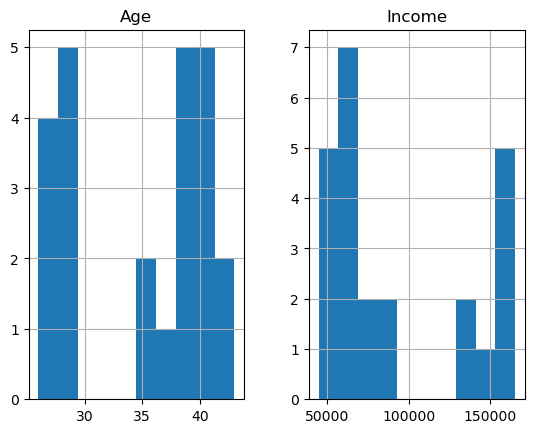

In [3]:
df.hist()

In [4]:
X =df[['Age','Income']]
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


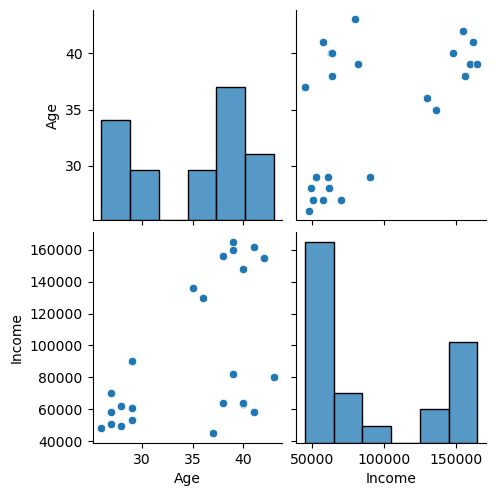

In [5]:
sns.pairplot(X)

In [6]:
from sklearn.cluster import KMeans

In [9]:
#default kmeans has n_clusters =8,
model = KMeans(n_clusters =3) #choose 3 clusters
model

KMeans(n_clusters=3)

In [10]:
#training:only X is used
model.fit(X)

KMeans(n_clusters=3)

In [12]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [13]:
len(X)

24

In [14]:
model.labels_  #output clusters

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 1])

In [15]:
model.predict([[46,170000]])

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [16]:
model.predict([[60,180000]])

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [17]:
model

KMeans(n_clusters=3)

In [18]:
#3 centroids = 3 clusters
model.cluster_centers_

array([[3.4500e+01, 8.0500e+04],
       [3.8750e+01, 1.5150e+05],
       [3.2500e+01, 5.6375e+04]])

In [19]:
model.cluster_centers_[:,0] #age data

array([34.5 , 38.75, 32.5 ])

In [20]:
model.cluster_centers_[:,1] #income data

array([ 80500., 151500.,  56375.])

Text(0, 0.5, 'Income')

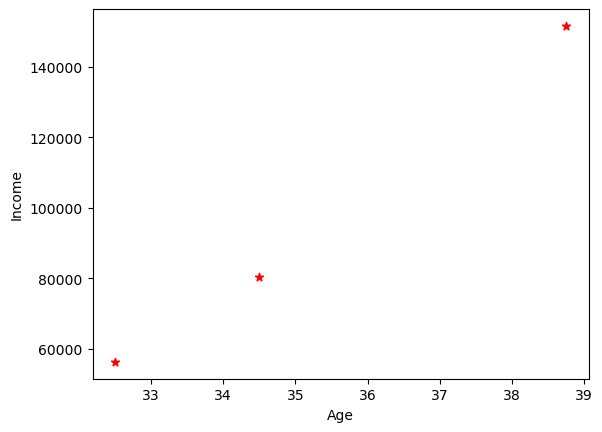

In [30]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='red',marker ='*')
plt.xlabel('Age')
plt.ylabel('Income')

In [31]:
#Testing phase
model.fit_predict(X)

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 0])

In [22]:
X[:2]

,Age,Income
0,27,70000
1,29,90000


In [23]:
X['cluster'] = model.fit_predict(X)
X

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,62000,0
4,42,155000,1
5,39,160000,1
6,41,162000,1
7,38,156000,1
8,36,130000,1
9,35,136000,1


In [24]:
X.shape

(24, 3)

In [27]:
df1 = X[X['cluster'] == 0] #cluster 1 df
df2= X[X['cluster']== 1] #cluster 2 df
df3 =X[X['cluster'] ==2 ]#cluster 3 df

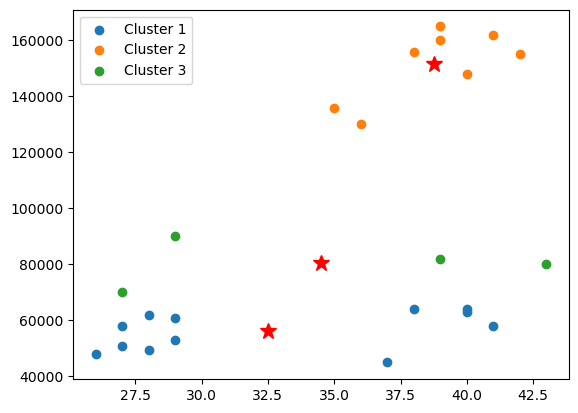

In [39]:
#Input data
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')

#cluster centroids
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*',markersize=12,linestyle= '')
plt.legend()

In [35]:
X[:3]

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0


In [37]:
#Scaling is required for age and Income also
scaler = MinMaxScaler()
df['Income'] =scaler.fit_transform(df[['Income']])
df['Age'] =scaler.fit_transform(df[['Age']])

In [38]:
df

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000
2,Shriya,0.176471,0.133333
3,Anita,0.117647,0.141667
4,Sudhir,0.941176,0.916667
5,Gajanan,0.764706,0.958333
6,Ranjit,0.882353,0.975000
7,Jyotsna,0.705882,0.925000
8,Nitish,0.588235,0.708333
9,Onkar,0.529412,0.758333


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

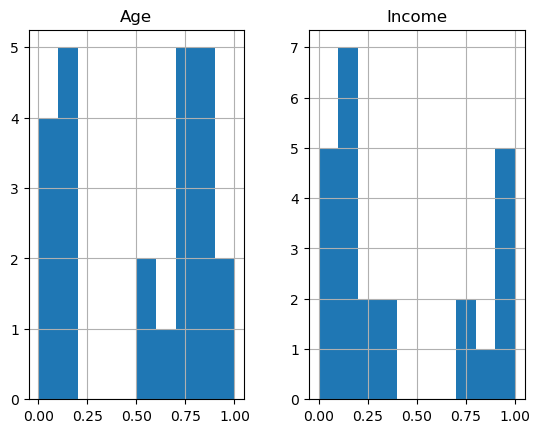

In [40]:
df.hist()

In [41]:
km = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [43]:
#age and Income are now normalised
y_pred = km.fit_predict(df[['Age','Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 0])

In [44]:
km.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 0])

In [45]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 0])

In [46]:
df[:2]

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000


In [47]:
df['Cluster']=y_pred

In [48]:
df[:3]

,Name,Age,Income,Cluster
0,Amit,0.058824,0.208333,1
1,Akash,0.176471,0.375000,1
2,Shriya,0.176471,0.133333,1


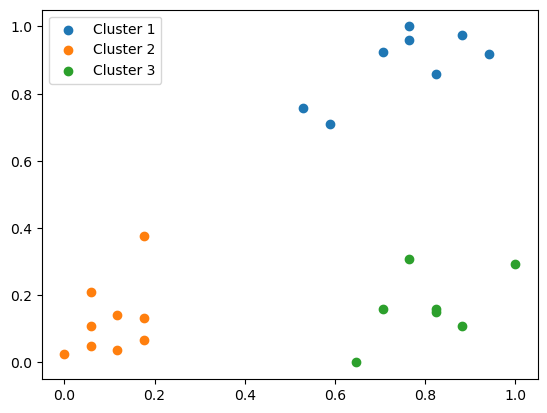

In [51]:
#plotting after scaling
df1 =df[df['Cluster'] == 0]
df2 =df[df['Cluster']== 1]
df3 =df[df['Cluster'] == 2]

plt.scatter(df1['Age'],df1['Income'],label = 'Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
plt.legend()

In [52]:
#check the centroids of cluster
km.cluster_centers_

array([[0.75      , 0.8875    ],
       [0.10457516, 0.12731481],
       [0.80672269, 0.16785714]])

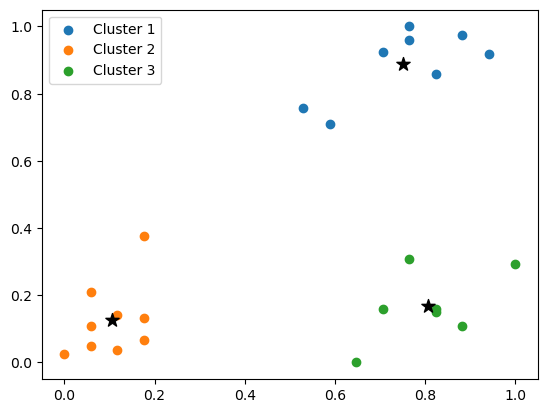

In [55]:
df1=df[df['Cluster'] == 0]
df2=df[df['Cluster'] == 1]
df3=df[df['Cluster']==2]

#Plotting of cluster data
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label ='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label ='Cluster 3')

#Plotting of Centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,marker ='*',color ='black')
plt.legend()

In [57]:
km.predict([[25,56000]])

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [59]:
km.predict([[19,100]])

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [60]:
test_data =df[['Age','Income']].sample(5)
test_data

,Age,Income
15,0.764706,1.000000
6,0.882353,0.975000
21,0.705882,0.158333
1,0.176471,0.375000
0,0.058824,0.208333


In [61]:
#With Scaling data
km.predict(test_data)

array([0, 0, 2, 1, 1])

In [62]:
without_test =X.iloc[test_data.index,:-1]
without_test

,Age,Income
15,39,165000
6,41,162000
21,38,64000
1,29,90000
0,27,70000


In [63]:
km.predict(without_test)

array([0, 0, 0, 0, 0])

## WCSS

In [64]:
km

KMeans(n_clusters=3)

In [65]:
km.inertia_ #WCSS

0.4920193431403063

In [66]:
X =df[['Age','Income']]
X

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000
2,0.176471,0.133333
3,0.117647,0.141667
4,0.941176,0.916667
5,0.764706,0.958333
6,0.882353,0.975000
7,0.705882,0.925000
8,0.588235,0.708333
9,0.529412,0.758333


In [69]:
wcss =[]
for i in range(1,11): #it will take 1 to 10 clusters
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
print(wcss)

[5.989760185886038, 2.372901455312517, 0.4920193431403063, 0.3311771990931449, 0.2563456831364082, 0.18681717418380756, 0.1625110259075035, 0.11815685924083684, 0.0970232928240741, 0.0725819496507753]


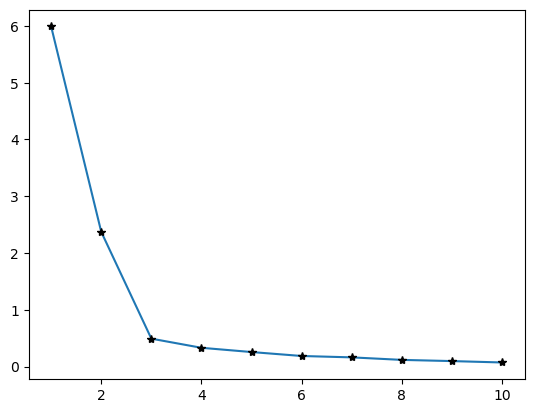

In [71]:
#Check elbow
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linestyle ='',marker='*',color ='k')